<a href="https://colab.research.google.com/github/prj-07/NLPbasics/blob/main/MALIGNANT_WORD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  opendatasets --quiet
import opendatasets as od 

In [2]:
od.download('https://www.kaggle.com/datasets/surekharamireddy/malignant-comment-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pratyushraj07
Your Kaggle Key: ··········


100%|██████████| 50.5M/50.5M [00:03<00:00, 14.7MB/s]


In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv('malignant-comment-classification/train.csv')

In [5]:
df = train_df

In [6]:
df.sample(15)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
106848,3b6153eaeb00dee1,"""\n\n Alicia Rickter's parents name \n\nHi Dis...",0,0,0,0,0,0
9111,1847acaa9c32ef1a,Someone needs to confirm the release date that...,0,0,0,0,0,0
82126,dbb38730595b7ef3,F-16 Fightiing Falcon Photo captions\n\nPer yo...,0,0,0,0,0,0
123007,920e0fa7897b7a41,"Once again, SHAME ON YOU MONSTERS! Recognize t...",1,0,1,0,1,0
102454,24473c18916a858e,"""\n\nI'm not pro or anti Richards. Some things...",0,0,0,0,0,0
101883,212bb5353596ae02,"""\n\n They always will be, a history of conque...",0,0,0,0,0,0
64535,acb74ea1396303b9,"""\nMy mistake; I should've said """"hebephilia""""...",0,0,0,0,0,0
40140,6b2098045b76d70c,"""\n Frosty is however the most notable use of ...",0,0,0,0,0,0
111546,54bb3a15477f2711,"|decline=Under the circumstances, I suggest th...",0,0,0,0,0,0
118083,76cd4cfe6589a02d,Yeah backfire is a very good word for it and I...,0,0,0,0,0,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
train_df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost
#import eli5
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import joblib

In [10]:
# Replace email addresses with 'email'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train_df['comment_text'] = train_df['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'number'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')
# Remove punctuation
train_df['comment_text'] = train_df['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\s+|\s+?$', '')

<ipython-input-10-e5a7f61a63c3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['comment_text'] = train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
<ipython-input-10-e5a7f61a63c3>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['comment_text'] = train_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
<ipython-input-10-e5a7f61a63c3>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['comment_text'] = train_df['comment_text'].str.replace(r'£|\$', 'dollers')
<ipython-input-10-e5a7f61a63c3>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
<ipython-input-10-e5a7f61a63c3

In [11]:
hams = train_df['comment_text'][train_df['malignant']==1]
hams


6              COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
12        Hey what is it talk What is it an exclusive gr...
16        Bye Don t look come or think of comming back T...
42        You are gay or antisemmitian Archangel WHite T...
43                   FUCK YOUR FILTHY MOTHER IN THE ASS DRY
                                ...                        
159494    our previous conversation you fucking shit eat...
159514                    YOU ARE A MISCHIEVIOUS PUBIC HAIR
159541    Your absurd edits Your absurd edits on great w...
159546    Hey listen don t you ever Delete my edits ever...
159554    and i m going to keep posting the stuff u dele...
Name: comment_text, Length: 15294, dtype: object

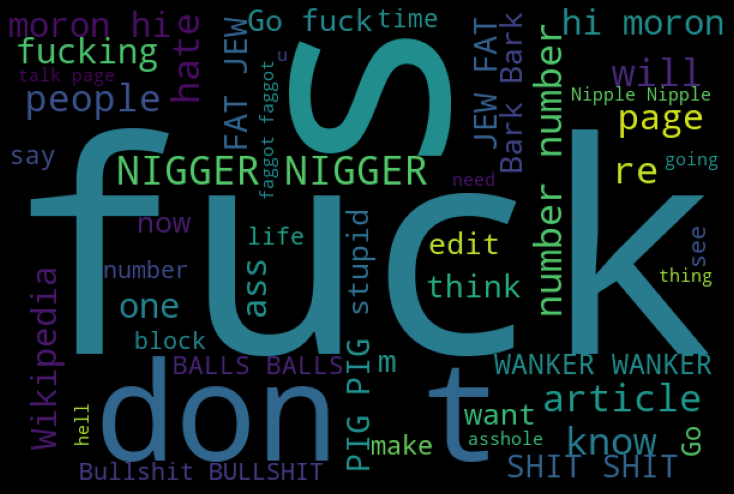

In [12]:
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [13]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [14]:
test_df = pd.read_csv('malignant-comment-classification/train.csv')


In [15]:
test_df.shape

(159571, 8)

In [16]:
test_df = test_df.sample(10000)


In [18]:
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^\s+/\s+?$' , '')


<ipython-input-18-adbae32f092e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_df['comment_text'] = test_df['comment_text'].str.replace(r'^\s+/\s+?$' , '')


In [19]:
test_df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [20]:
test_df.head(15)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
90396,f1e6a412a5f1653d,"""\n\n Why your page was deleted \n\nFirst of a...",0,0,0,0,0,0
93858,faf8e97c31d2a06f,"""\nIf you look at the comments from the last F...",0,0,0,0,0,0
40927,6d38d1230c99f501,Mike. did it ever occur to your magnificent mi...,0,0,0,0,0,0
26536,464d96112d1a72fd,"""==Your edit to Liliuokalani==\nWelcome, and t...",0,0,0,0,0,0
4479,0beb05332897d1da,Trevithj: The reason sources discussing the ...,0,0,0,0,0,0
112700,5ae14dd1dd89e899,Nyttend \n\nI've just spent quite a few minute...,0,0,0,0,0,0
113953,6179ee101f1b645a,Carlos Tevez \n\nMate you might wanna check bb...,0,0,0,0,0,0
118825,7b105642b21a7885,"""\n\n Note about Murder In Greenwich \n I was ...",0,0,0,0,0,0
94264,fc1cc856a201713f,"""\n\n Larklight trilogy \n\nHi,\n\nRe. Larklig...",0,0,0,0,0,0
159540,ff9e91b29b89c5fa,I find this block ridiculous and a kick in the...,0,0,0,0,0,0


In [35]:
df.shape

(50000, 8)

In [21]:
df = df.sample(20000)
train_df = train_df.sample(20000)

In [22]:
df = train_df

In [23]:
train_df.reset_index(inplace=True) 


In [24]:
test_df.reset_index(inplace = True)

In [29]:
for i in range(len(test_df['comment_text'])):
    test_df['comment_text'][i] = test_df['comment_text'][i].lower()
    j = []
    for word in test_df['comment_text'][i].split():
        j.append(lemmatizer.lemmatize(word, pos="v"))
        test_df['comment_text'][i] = "".join(j)

<ipython-input-29-d2a1668e149b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['comment_text'][i] = test_df['comment_text'][i].lower()
<ipython-input-29-d2a1668e149b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['comment_text'][i] = "".join(j)


In [26]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [27]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [28]:
for i in range(len(train_df['comment_text'])):
    train_df['comment_text'][i] = train_df['comment_text'][i].lower()
    j = []
    for word in train_df['comment_text'][i].split():
        j.append(lemmatizer.lemmatize(word, pos="v"))
        train_df['comment_text'][i] = "".join(j)

<ipython-input-28-52d5407ca6ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['comment_text'][i] = train_df['comment_text'][i].lower()
<ipython-input-28-52d5407ca6ea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['comment_text'][i] = "".join(j)


In [30]:
x = train_df.drop(['malignant'],axis=1)
y = train_df['malignant']
naive = MultinomialNB()

In [31]:
tf_vec = TfidfVectorizer()
comment = train_df['comment_text']
x = tf_vec.fit_transform(comment)
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42)
naive.fit(x_train,y_train)

MultinomialNB()

In [32]:
y_pred = naive.predict(x_test)
joblib.dump(y_pred, "model")

['model']

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [4]:
stat = ["I FOUND YOU","I HATE YOU","FUCK YOU" ]

In [8]:
for i in range(len(stat)):
  stat[i] = stat[i].lower()
#stat = stat.lower()

In [9]:
stat

['i found you', 'i hate you', 'fuck you']

In [10]:
for i in range(len(stat)):
  stat[i] = stat[i].lower()
  j = []
  for word in stat[i].split():
    j.append(lemmatizer.lemmatize(word, pos="v"))
    stat[i] = "".join(j)

NameError: ignored